<a href="https://colab.research.google.com/github/arbi11/CEFC-2022/blob/main/Fat_Model_Rescaled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from time import time

Good to know what version of tensorflow we're using...

In [ ]:
print(tf.version.VERSION)

2.8.2


# Data Acquisition and Cleanup

In [ ]:
for (name, (train_url, test_url)) in {
    'M6': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vStmjk37Gyxo04Jh_cR0yu-My4Y2KfiXRzNqI9iztS1V5ezxepehbmQOYSNDsao3Sxrksxr5kH0NqBg/pub?gid=405256803&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCx2G0k-SUnmQxg_9TuW-o-D5Z44itWiciuHIkbGXxHPjEPBxbRVP2TMdN7GxRQtkMkkUBUv_IrLXr/pub?gid=1464939435&single=true&output=csv'),
    'M19': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTX1O03TCJYomYg1QU6SpGi-OhR_V3Kkx1Xkc2JUpaWaLlztDSLMn6eFXyFmaVZrmRIJjGoqY5LkENP/pub?gid=1103714291&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vQQFzZz0My7iSpzHtl2K2m-2oBCHT--nqaXZiPxct4sJO2CPQWiRD6HRA8AeJHHQkY6bcu9lxatiLaP/pub?gid=1992106649&single=true&output=csv'),
    'M27': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdXKEhlJTJJ51CppTioNYQRU7Ehq1ENVg3AeUx62jmkCe8g1miMc7yjcHmqfWyjg3bfJtRoXN77Eb-/pub?gid=635614041&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMECgV6ErVI3a0_8tK6ymGVtvmff_ADVvJ6THlVTv0sL2jn3KAFcTuU04zw2LCmMxPFdY1lEzbi_aB/pub?gid=1533844294&single=true&output=csv'),
    '20PNF1500': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTBWwGhiUQBhBTGz4DZqAwDaeVxbwxWJDJZpvWQLesTYLDD8ehmMC7OENkgzyohLrCxtcbEKvaABk4Y/pub?gid=1807288876&single=true&output=csv',
                  'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMlA32y9eSewKWs5j3R6FVi5-eQcUhgCzpiLUXlF8adWgScy0lw5-imD6GM0SA_-sHVM8VCtIpYhSP/pub?gid=222833859&single=true&output=csv'),
  }.items():
  print(name)

  # *  Get rid of the 5 useless rows at the beginning of each file
  # *  Normalize the column names to 't', 'Hx', 'Bx', 'Hy', 'By', 'Hz', 'Bz'
  df = pd.read_csv(train_url, skiprows=5, usecols=range(1, 8))
  df.to_csv(f"{name}_train.csv", index=False)
  print(f"  train set: {df.shape}")

  df = pd.read_csv(test_url, skiprows=5, usecols=range(1, 8))
  df.rename(columns={'H x': 'Hx', 'B x': 'Bx', 'H y': 'Hy', 'B y': 'By', 'H z': 'Hz', 'B z': 'Bz'}, inplace=True)
  df.to_csv(f"{name}_test.csv", index=False)
  print(f"  test set:  {df.shape}")

print("\nDone")

M6
  train set: (2001, 7)
  test set:  (11766, 7)
M19
  train set: (2001, 7)
  test set:  (1178, 7)
M27
  train set: (2001, 7)
  test set:  (1178, 7)
20PNF1500
  train set: (2001, 7)
  test set:  (11766, 7)

Done


And the M6 dataset with 20000 data points...

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4v2LZFBH-tn1nSFUkL8M3cOZSh1I1jQzXsoLyGtdt--hAgyfEYYk087pFB7iatP7FvJsdM9fvfzAG/pub?gid=1926006206&single=true&output=csv',
                 skiprows=5, usecols=range(1, 8))
df.to_csv("M6_train20000.csv", index=False)
print(f"M6 (20000 data point version): {df.shape}")
del df

M6 (20000 data point version): (20001, 7)


# Data Exploration and Visualization

## M6 (2000 data point version)

In [ ]:
df = pd.read_csv('./M6_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.005460  0.000075 -1.190000e-17 -2.860000e-17   0   
2       0.2   0.024100  0.000329  1.640000e-14  2.480000e-16   0   
3       0.3   0.042700  0.000584  1.820000e-12 -2.040000e-15   0   
4       0.4   0.061300  0.000839 -2.310000e-14 -3.810000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  26.553186 -0.238842 -4.110000e-10 -2.940000e-11   0   
1997  199.7  27.205196 -0.188133 -3.350000e-10 -2.880000e-11   0   
1998  199.8  27.729051 -0.137423 -2.390000e-10 -1.390000e-11   0   
1999  199.9  28.159743 -0.086700  1.470000e-10 -1.010000e-11   0   
2000  200.0  28.529760 -0.036000  1.970000e-10 -1.290000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.172737e-315  
2     3.172737e-315  
3     3.172737e-315  
4     3.172737e-315  
...             ...  
1996  3.172737e-315  
1997  3.172737e-315  
1998  3.172737e-315  
1999  3.172737e-315  
2000  3.172737e-315  

[2001 rows x 7 columns]

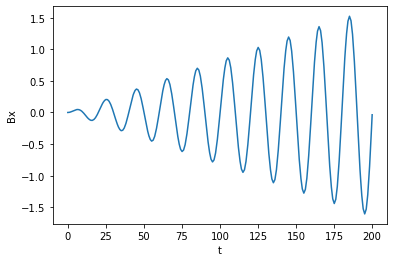

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

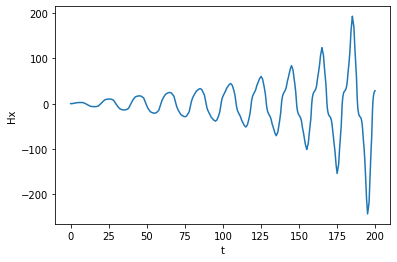

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

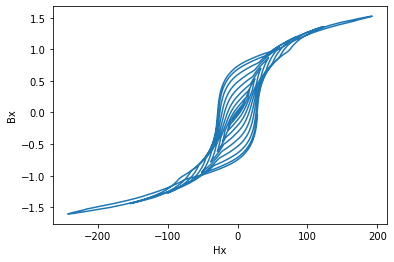

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M6 (20000 data point version)

In [ ]:
df = pd.read_csv('./M6_train20000.csv')
df

t        Hx        Bx            Hy            By  Hz   Bz
0        0.00  0.000000  0.000000  0.000000e+00  0.000000e+00   0  0.0
1        0.01  0.000546  0.000007 -1.460000e-18  2.090000e-18   0  0.0
2        0.02  0.002410  0.000033  1.020000e-15  3.830000e-17   0  0.0
3        0.03  0.004280  0.000058  5.400000e-15  1.540000e-16   0  0.0
4        0.04  0.006140  0.000084  6.350000e-15  7.590000e-17   0  0.0
...       ...       ...       ...           ...           ...  ..  ...
19996  199.96  7.536977 -0.023900 -1.470000e-09 -6.500000e-11   0  0.0
19997  199.97  7.799354 -0.018800 -1.430000e-09 -6.470000e-11   0  0.0
19998  199.98  8.057725 -0.013800 -1.400000e-09 -6.450000e-11   0  0.0
19999  199.99  8.312216 -0.008700 -1.370000e-09 -6.480000e-11   0  0.0
20000  200.00  8.562948 -0.003630 -1.360000e-09 -6.500000e-11   0  0.0

[20001 rows x 7 columns]

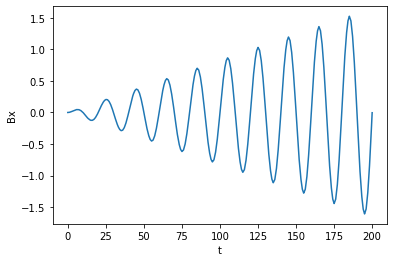

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

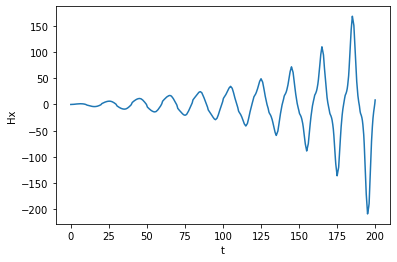

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

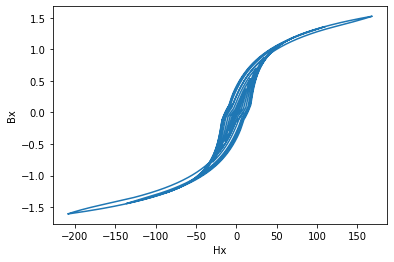

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M19

In [ ]:
df = pd.read_csv('./M19_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.016100  0.000075  4.930000e-18 -4.960000e-18   0   
2       0.2   0.070900  0.000329  1.070000e-14  6.050000e-16   0   
3       0.3   0.125582  0.000584 -6.320000e-12 -1.900000e-14   0   
4       0.4   0.180231  0.000838 -7.490000e-13  7.610000e-15   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  54.128872 -0.238981 -4.310000e-10 -1.650000e-11   0   
1997  199.7  55.785869 -0.188277 -6.320000e-10 -1.970000e-11   0   
1998  199.8  56.959727 -0.137570 -7.640000e-10 -1.890000e-11   0   
1999  199.9  57.788775 -0.086900 -6.110000e-10 -1.910000e-11   0   
2000  200.0  58.398845 -0.036200 -4.680000e-10 -1.910000e-11   0   

                 Bz  
0     3.234392e-317  
1     3.231985e-315  
2     3.231985e-315  
3     3.231985e-315  
4     3.231985e-315  
...             ...  
1996  3.231985e-315  
1997  3.231985e-315  
1998  3.231985e-315  
1999  3.231985e-315  
2000  3.231985e-315  

[2001 rows x 7 columns]

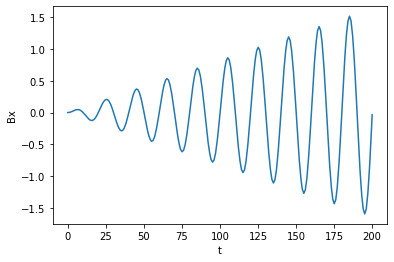

In [ ]:
plt.plot(df['t'], df['Bx'])
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

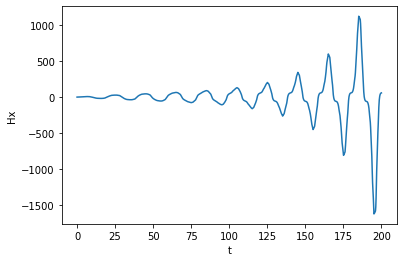

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

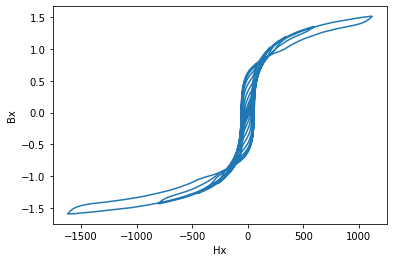

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M27

In [ ]:
df = pd.read_csv('./M27_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.029800  0.000074  5.050000e-17 -1.030000e-17   0   
2       0.2   0.131281  0.000329 -1.940000e-14 -1.540000e-15   0   
3       0.3   0.232548  0.000583  2.660000e-12  5.720000e-16   0   
4       0.4   0.333579  0.000837  1.590000e-12 -3.440000e-16   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  83.234273 -0.239127  1.010000e-09  1.200000e-11   0   
1997  199.7  84.088881 -0.188419  2.940000e-10  1.080000e-11   0   
1998  199.8  84.683009 -0.137710  4.460000e-10  1.200000e-11   0   
1999  199.9  85.103368 -0.087000  2.890000e-10  1.200000e-11   0   
2000  200.0  85.431758 -0.036300  2.650000e-10  1.230000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.173707e-315  
2     3.173707e-315  
3     3.173707e-315  
4     3.173707e-315  
...             ...  
1996  3.173707e-315  
1997  3.173707e-315  
1998  3.173707e-315  
1999  3.173707e-315  
2000  3.173707e-315  

[2001 rows x 7 columns]

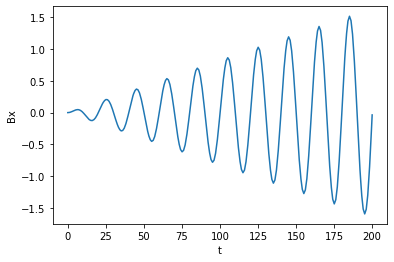

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

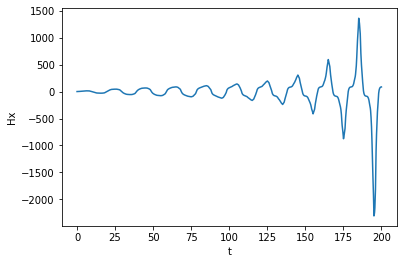

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

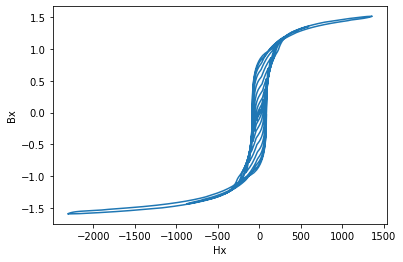

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## 20PNF1500

In [ ]:
df = pd.read_csv('./20PNF1500_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.008970  0.000075  2.070000e-18  2.190000e-17   0   
2       0.2   0.039600  0.000329 -2.010000e-14 -8.070000e-16   0   
3       0.3   0.070200  0.000584 -1.240000e-12  1.240000e-14   0   
4       0.4   0.100677  0.000839  2.140000e-12  3.780000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  24.903787 -0.238834 -7.050000e-10 -1.320000e-11   0   
1997  199.7  26.197892 -0.188128 -7.090000e-10 -1.350000e-11   0   
1998  199.8  27.139616 -0.137420 -6.050000e-10 -9.640000e-12   0   
1999  199.9  27.827180 -0.086700 -1.980000e-10 -8.510000e-12   0   
2000  200.0  28.348415 -0.036000 -2.660000e-10 -1.240000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.332685e-315  
2     3.332685e-315  
3     3.332685e-315  
4     3.332685e-315  
...             ...  
1996  3.332685e-315  
1997  3.332685e-315  
1998  3.332685e-315  
1999  3.332685e-315  
2000  3.332685e-315  

[2001 rows x 7 columns]

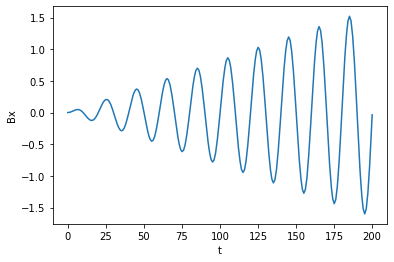

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

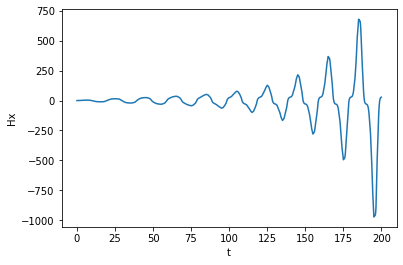

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

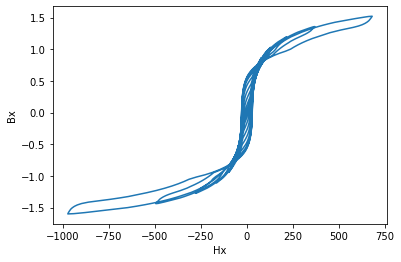

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

# Training and Testing Sets

In this one, we do one extra thing, which is to one-hot encoding them as follows:

 Material | Pattern
----------|--------
M6        | 1000
M19       | 0100
M27       | 0010
20PNF1500 | 0001

In [ ]:
def generate_timesteps(df, offset, window=1, max_offs=4):
  assert window > 0
  assert 0 <= offset < max_offs

  y = np.zeros((len(df), window, 1))
  x = np.zeros((len(df), window, 2 + max_offs))

  for w in range(window):
    y[w:, window - w - 1, 0] = df['Bx'][:len(df) - w]

  for w in range(window):
    x[w:, window - w - 1, 0] = df['Hx'][:len(df) - w]

  for w in range(window):
    x[w + 1:, window - w - 1, 1] = df['Bx'][:len(df) - w - 1]

  x[:, :, 2 + offset] = 1

  return (x, y[:, -1, :])

## M6 (2000 data point version)

In [ ]:
(M6_train_X, M6_train_Y) = generate_timesteps(pd.read_csv('./M6_train.csv'), offset=3, window=30)
(M6_test_X, M6_test_Y)   = generate_timesteps(pd.read_csv('./M6_test.csv'), offset=3, window=30)

print("Training Set")
print(f"  X: {M6_train_X.shape}")
print(f"  Y: {M6_train_Y.shape}")

print("Testing Set")
print(f"  X: {M6_test_X.shape}")
print(f"  Y: {M6_test_Y.shape}")

Training Set
  X: (2001, 30, 6)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 6)
  Y: (11766, 1)


## M6 (20000 data point version)

In [ ]:
(M6_20000_train_X, M6_20000_train_Y) = generate_timesteps(pd.read_csv('./M6_train20000.csv'), offset=3, window=30)

print("Training Set")
print(f"  X: {M6_20000_train_X.shape}")
print(f"  Y: {M6_20000_train_Y.shape}")

Training Set
  X: (20001, 30, 6)
  Y: (20001, 1)


## M19

In [ ]:
(M19_train_X, M19_train_Y) = generate_timesteps(pd.read_csv('./M19_train.csv'), offset=2, window=30)
(M19_test_X, M19_test_Y)   = generate_timesteps(pd.read_csv('./M19_test.csv'), offset=2, window=30)

print("Training Set")
print(f"  X: {M19_train_X.shape}")
print(f"  Y: {M19_train_Y.shape}")

print("Testing Set")
print(f"  X: {M19_test_X.shape}")
print(f"  Y: {M19_test_Y.shape}")

Training Set
  X: (2001, 30, 6)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 6)
  Y: (1178, 1)


## M27

In [ ]:
(M27_train_X, M27_train_Y) = generate_timesteps(pd.read_csv('./M27_train.csv'), offset=1, window=30)
(M27_test_X, M27_test_Y)   = generate_timesteps(pd.read_csv('./M27_test.csv'), offset=1, window=30)

print("Training Set")
print(f"  X: {M27_train_X.shape}")
print(f"  Y: {M27_train_Y.shape}")

print("Testing Set")
print(f"  X: {M27_test_X.shape}")
print(f"  Y: {M27_test_Y.shape}")

Training Set
  X: (2001, 30, 6)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 6)
  Y: (1178, 1)


## 20PNF1500

In [ ]:
(_20PNF1500_train_X, _20PNF1500_train_Y) = generate_timesteps(pd.read_csv('./20PNF1500_train.csv'), offset=0, window=30)
(_20PNF1500_test_X, _20PNF1500_test_Y)   = generate_timesteps(pd.read_csv('./20PNF1500_test.csv'), offset=0, window=30)

print("Training Set")
print(f"  X: {_20PNF1500_train_X.shape}")
print(f"  Y: {_20PNF1500_train_Y.shape}")

print("Testing Set")
print(f"  X: {_20PNF1500_test_X.shape}")
print(f"  Y: {_20PNF1500_test_Y.shape}")

Training Set
  X: (2001, 30, 6)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 6)
  Y: (11766, 1)


## Squashed

In [ ]:
Squashed_train_X = np.concatenate([
    M6_train_X,
    # M6_20000_train_X,
    M19_train_X,
    M27_train_X,
    _20PNF1500_train_X
])

Squashed_train_Y = np.concatenate([
    M6_train_Y,
    # M6_20000_train_Y,
    M19_train_Y,
    M27_train_Y,
    _20PNF1500_train_Y
])

print("Squashed Training Set")
print(f"  X: {Squashed_train_X.shape}")
print(f"  Y: {Squashed_train_Y.shape}")

Squashed Training Set
  X: (8004, 30, 6)
  Y: (8004, 1)


# ML Models

## Temporal Convolution Network (CNV4)

In [ ]:
def new_model_cnv4():
  input = tf.keras.layers.Input(shape=(7, 6))

  x = input
  for i in range(4):
    x = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    y = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    x = tf.keras.layers.Add()([x, y])

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Dense(1, activation='linear')(x)
  x = tf.keras.layers.Flatten()(x)

  model = tf.keras.Model(inputs=input, outputs=x)
  return model

new_model_cnv4().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 6)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 7, 128)       3200        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 7, 128)       65664       ['conv1d[0][0]']                 
                                                                                                  
 add (Add)                      (None, 7, 128)       0           ['conv1d[0][0]',                 
                                                                  'conv1d_1[0][0]']           

## LSTM

In [ ]:
def new_model_lstm():
  return tf.keras.Sequential([
    tf.keras.layers.LSTM(400, input_shape=(None, 6), return_sequences=True),
    tf.keras.layers.LSTM(400),
    tf.keras.layers.Dense(1),
  ])

new_model_lstm().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 400)         651200    
                                                                 
 lstm_1 (LSTM)               (None, 400)               1281600   
                                                                 
 dense_4 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,933,201
Trainable params: 1,933,201
Non-trainable params: 0
_________________________________________________________________


## GRU1

In [ ]:
def new_model_gru1():
  input = tf.keras.Input(shape=(None, 6))

  x = tf.keras.layers.GRU(32, return_sequences=True)(input)
  x = tf.keras.layers.GRU(1)(x)

  model = tf.keras.Model(input, x)
  return model

new_model_gru1().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 6)]         0         
                                                                 
 gru (GRU)                   (None, None, 32)          3840      
                                                                 
 gru_1 (GRU)                 (None, 1)                 105       
                                                                 
Total params: 3,945
Trainable params: 3,945
Non-trainable params: 0
_________________________________________________________________


# Model Utilities

In [ ]:
def compile_and_fit(model, train_X, train_Y,
                    epochs=1000,
                    patience=10,
                    min_delta=0,
                    batch_size=50,
                    seed=9763):
  if seed is not None:
    np.random.seed(seed)
    tf.random.set_seed(seed)

  model.compile(loss='mse', optimizer='adam')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    mode='auto',
                                                    verbose=0,
                                                    min_delta=min_delta,
                                                    patience=patience)
  
  # sneaky normalization
  train_X = np.array(train_X, copy=True)
  train_Y = np.array(train_Y, copy=True)
  train_X[:, :, 1] /= 1.5
  train_Y /= 1.5
  np.clip(train_Y, -1, 1, out=train_Y)

  return model.fit(train_X, train_Y,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[early_stopping])

In [ ]:
def plot_train_stats(history):
  plt.plot(history.history['loss'])
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.show()

In [ ]:
def plot_predictions(pred, actual, **kwargs):
  (fig, ax) = plt.subplots(2, sharex=True, **kwargs)

  ax[0].plot(actual, label='expected')
  ax[0].plot(pred, label='prediction')
  ax[0].set_ylabel('Bx')
  ax[0].legend()

  ax[1].plot(np.abs(actual - pred))
  ax[1].set_ylabel('delta')
  ax[1].grid()

  plt.xlabel('t')
  plt.show()

  print(f"MSE: {np.square(actual - pred).mean()}")

In [ ]:
def inference_loop(model, data_X):
  data_X = np.array(data_X, copy=True)

  # sneaky normalization
  data_X[:, :, 1] /= 1.5

  y = np.empty(len(data_X))
  print(f"Start inference loop on {len(data_X)} samples...", end="")
  start = time()
  for i in range(len(data_X) - 1):
    y[i] = model.predict(data_X[i, None]).flatten()[-1]

    data_X[i + 1, :-1, 1] = data_X[i, 1:, 1]
    data_X[i + 1, -1, 1] = y[i]

  i = len(data_X) - 1
  y[i] = model.predict(data_X[i, None]).flatten()[-1]
  end = time()
  print(f" DONE after {end - start}s")
  return y.reshape((-1, 1)) * 1.5   # undo Bx normalization

# Model Performance

## CNV4

Note that CNV4 uses 7 timesteps while the data has 30. Need to only keep the last 7.

### Training

Epoch 1/1000
161/161 [==============================] - 8s 36ms/step - loss: 0.1727
Epoch 2/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0118
Epoch 3/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0058
Epoch 4/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0032
Epoch 5/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0018
Epoch 6/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.0016
Epoch 7/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.0010
Epoch 8/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0013
Epoch 9/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.0013
Epoch 10/1000
161/161 [==============================] - 6s 36ms/step - loss: 7.9776e-04
Epoch 11/1000
161/161 [==============================] - 6s 35ms/step - loss: 7.8985e-04
Epoch 12/1000
161/161 [==============================] - 6s 36ms/s

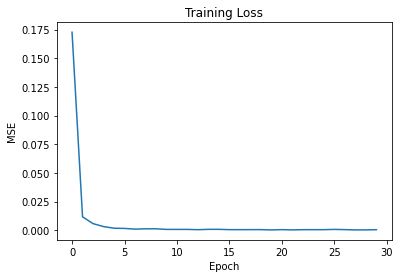

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, Squashed_train_X[:, -7:, :], Squashed_train_Y)
model.save('./Model_CNV4_Squashed')
plot_train_stats(history)
del model, history

### M6 (2000 data point version)

Start inference loop on 2001 samples... DONE after 88.16610455513s


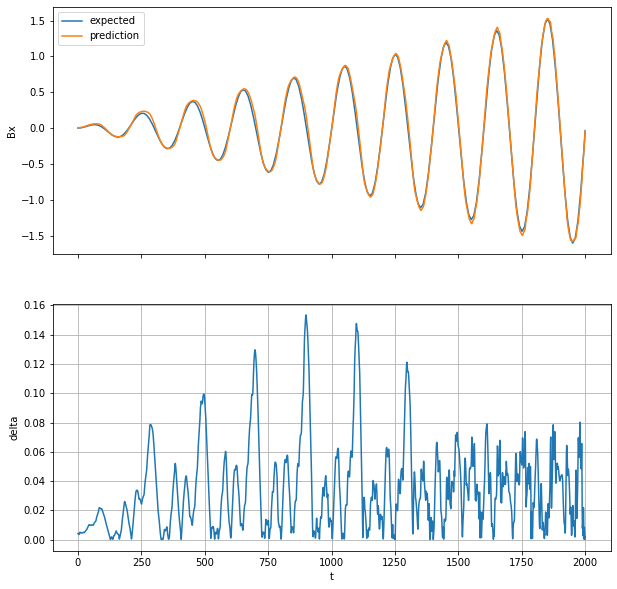

MSE: 0.0020867420414852752


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M6_train_X[:, -7:, :])
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

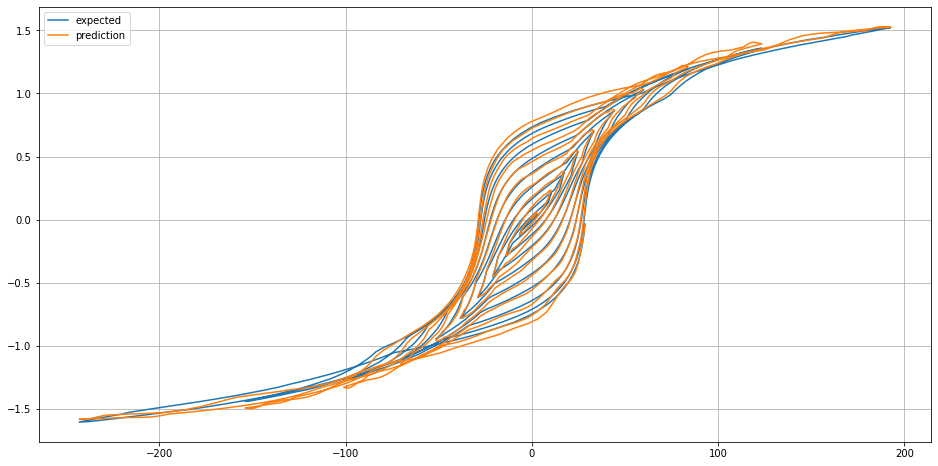

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 522.0463552474976s


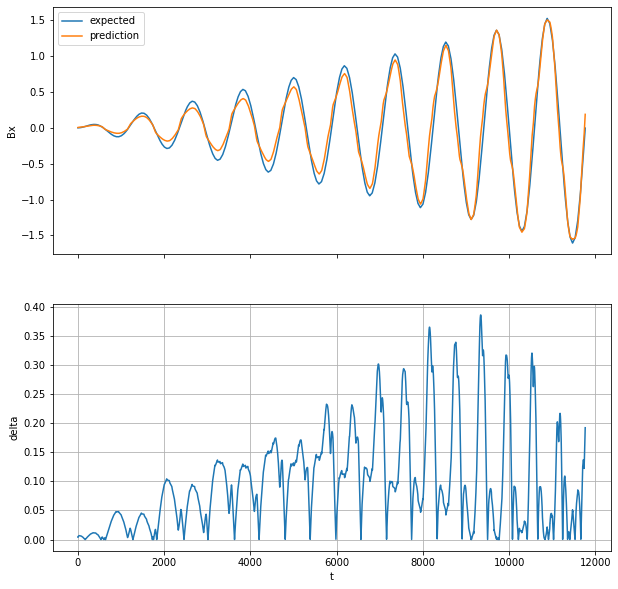

MSE: 0.01676508384499528


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M6_test_X[:, -7:, :])
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

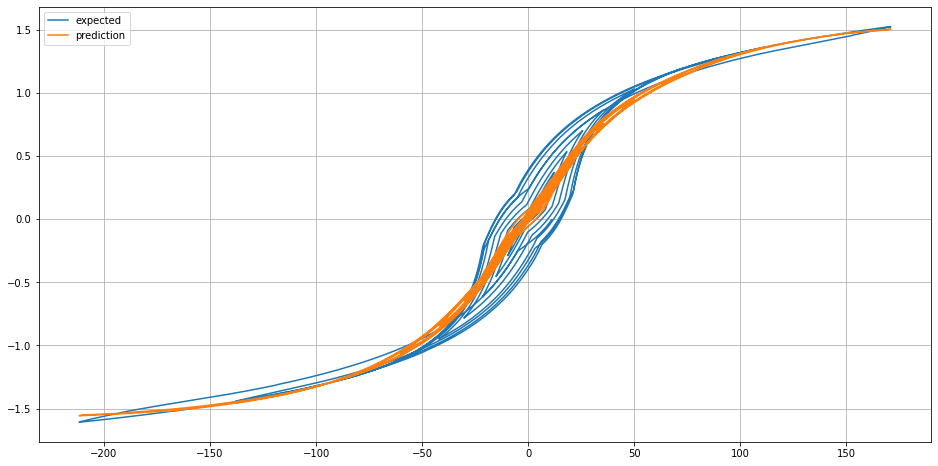

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Start inference loop on 2001 samples... DONE after 90.03596520423889s


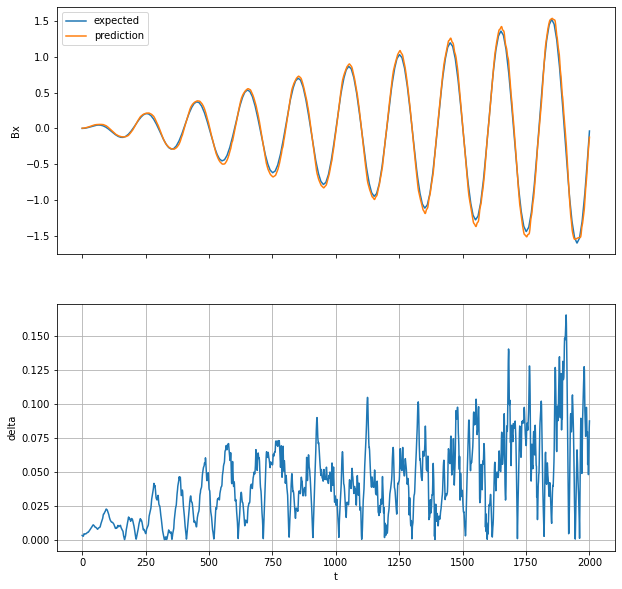

MSE: 0.0024990748659941783


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M19_train_X[:, -7:, :])
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

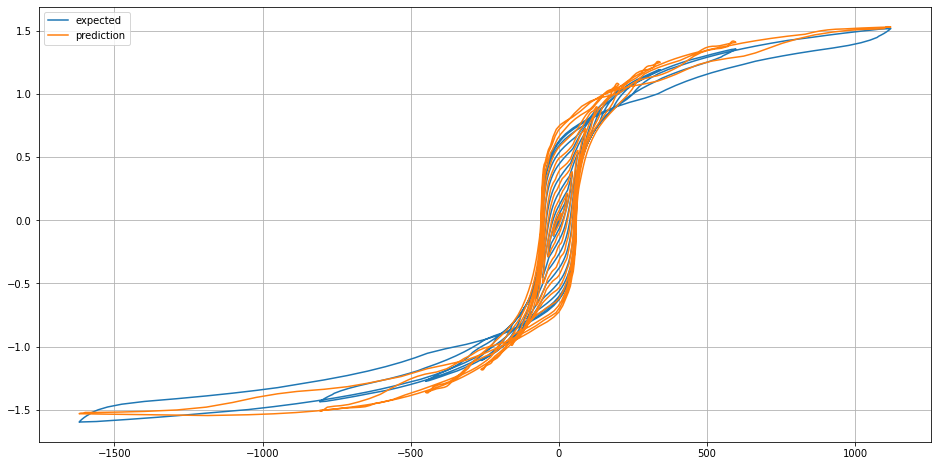

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 52.540350914001465s


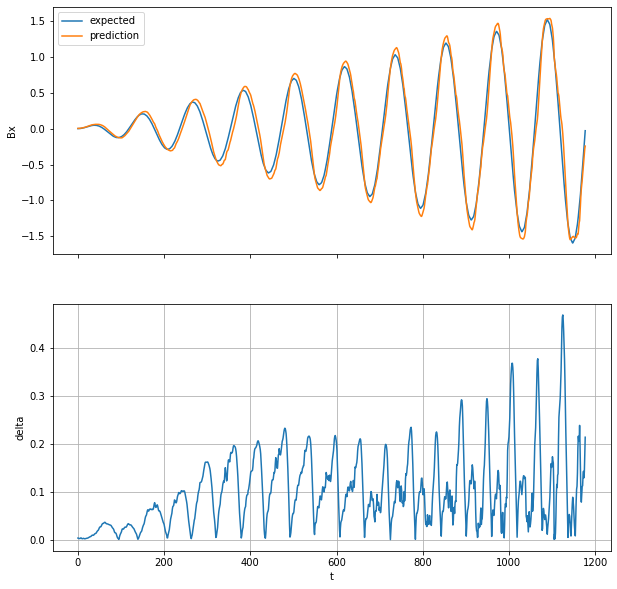

MSE: 0.015976243492495452


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M19_test_X[:, -7:, :])
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

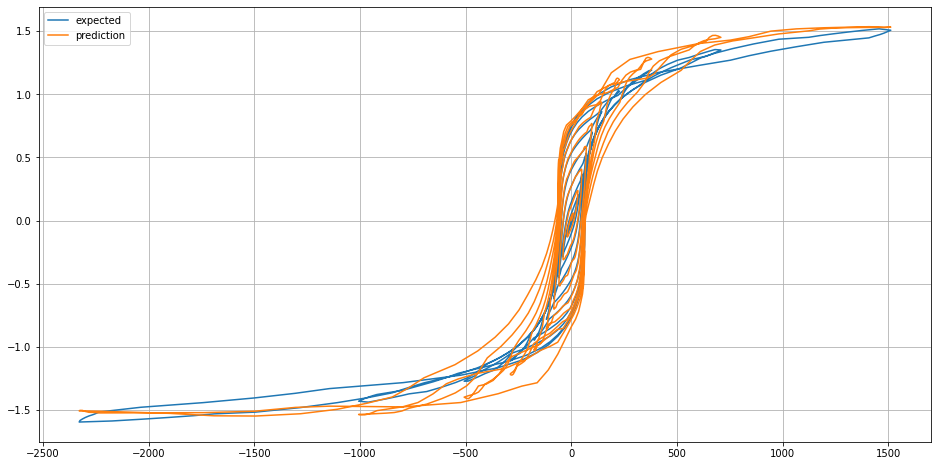

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Start inference loop on 2001 samples... DONE after 90.67459273338318s


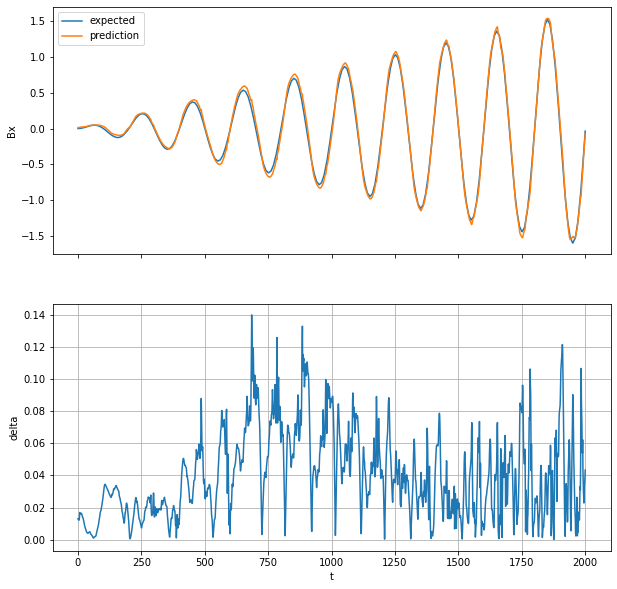

MSE: 0.002274198563549239


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M27_train_X[:, -7:, :])
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

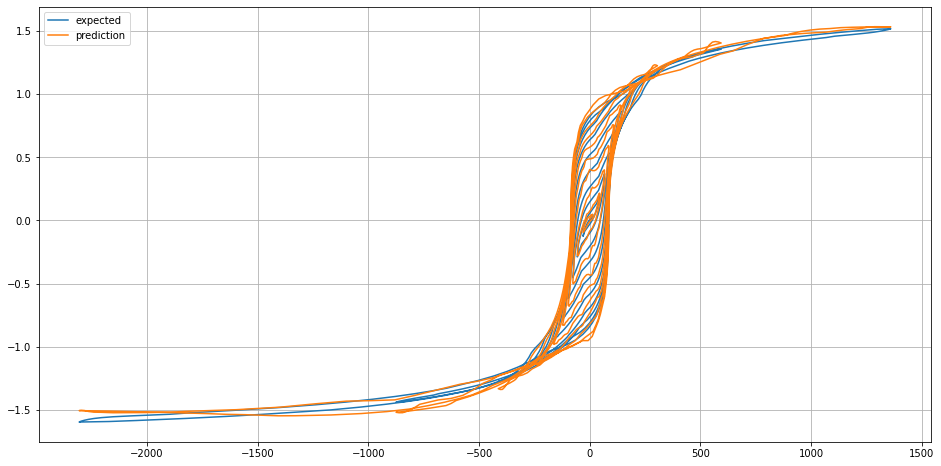

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 52.78572630882263s


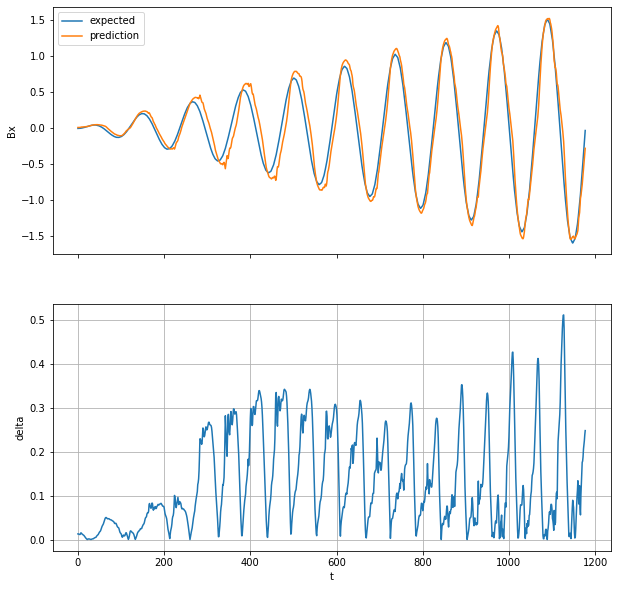

MSE: 0.02925318835687437


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, M27_test_X[:, -7:, :])
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

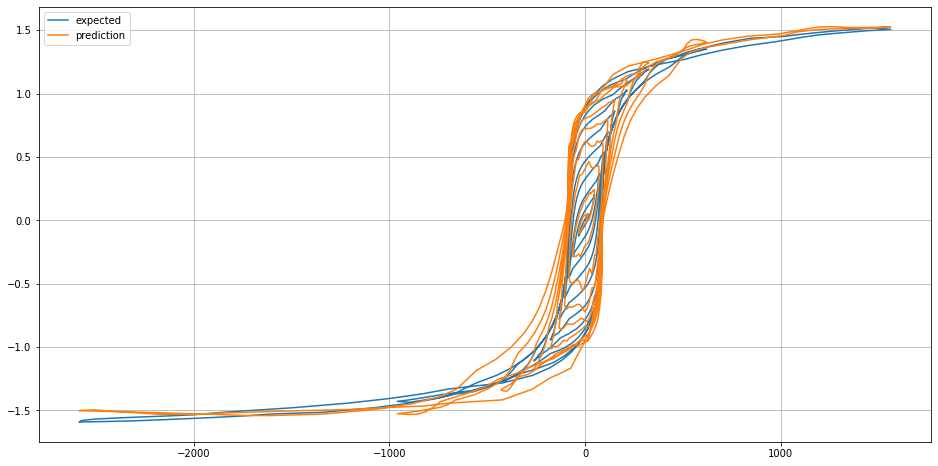

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Start inference loop on 2001 samples... DONE after 89.57304811477661s


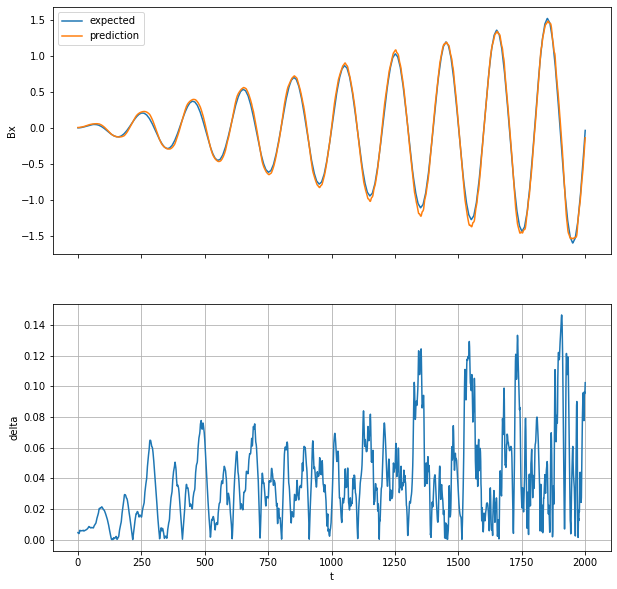

MSE: 0.0022049740981460453


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, _20PNF1500_train_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

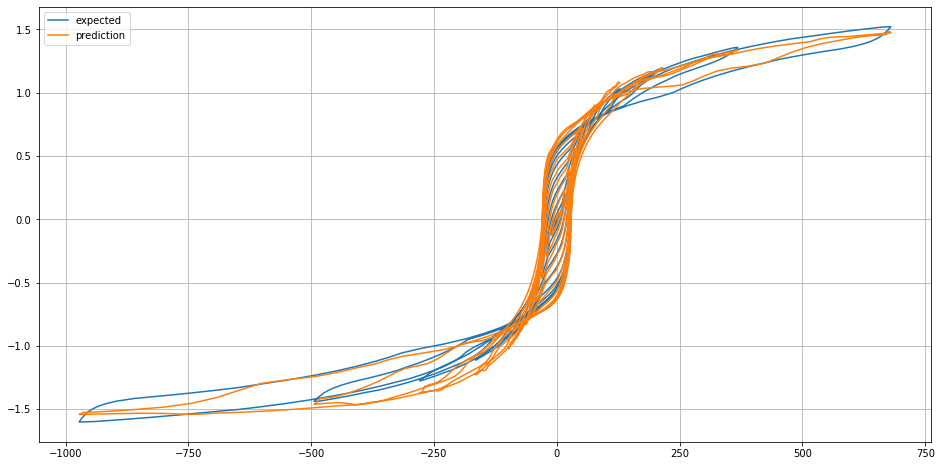

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 535.0537815093994s


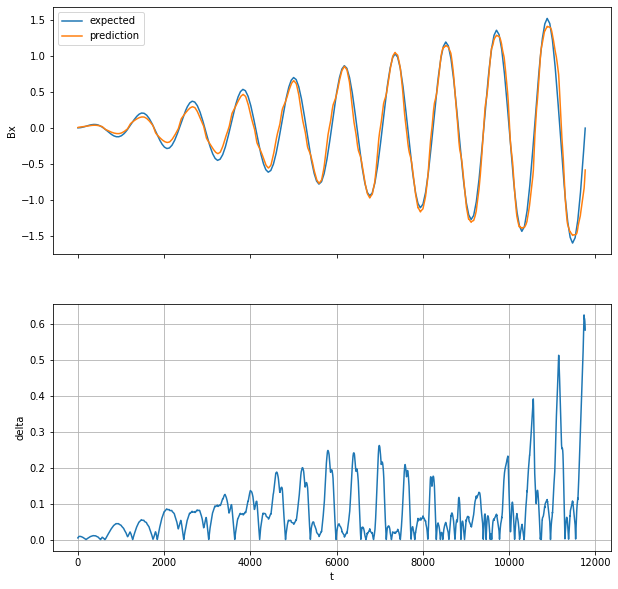

MSE: 0.013106790661790864


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_Squashed')
pred = inference_loop(model, _20PNF1500_test_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

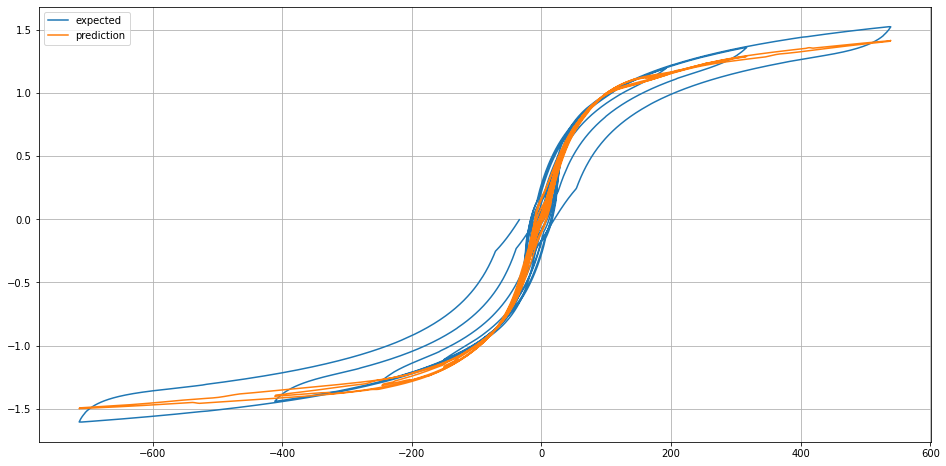

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## LSTM

### Training

Epoch 1/1000
161/161 [==============================] - 72s 432ms/step - loss: 0.0857
Epoch 2/1000
161/161 [==============================] - 69s 425ms/step - loss: 0.0020
Epoch 3/1000
161/161 [==============================] - 70s 433ms/step - loss: 9.2450e-04
Epoch 4/1000
161/161 [==============================] - 75s 463ms/step - loss: 0.0010
Epoch 5/1000
161/161 [==============================] - 74s 461ms/step - loss: 7.3972e-04
Epoch 6/1000
161/161 [==============================] - 77s 478ms/step - loss: 4.8874e-04
Epoch 7/1000
161/161 [==============================] - 77s 476ms/step - loss: 6.0318e-04
Epoch 8/1000
161/161 [==============================] - 77s 478ms/step - loss: 4.8224e-04
Epoch 9/1000
161/161 [==============================] - 75s 466ms/step - loss: 4.7870e-04
Epoch 10/1000
161/161 [==============================] - 74s 462ms/step - loss: 4.4293e-04
Epoch 11/1000
161/161 [==============================] - 74s 457ms/step - loss: 2.9929e-04
Epoch 12/1000
161/16

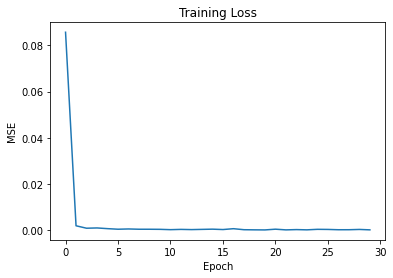

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, Squashed_train_X, Squashed_train_Y)
model.save('./Model_LSTM_Squashed')
plot_train_stats(history)
del model, history

### M6 (2000 data point version)

Start inference loop on 2001 samples... DONE after 105.4172146320343s


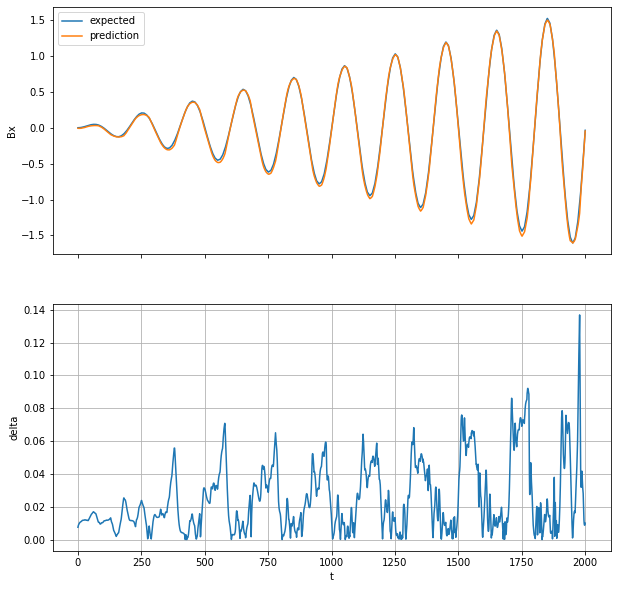

MSE: 0.0010581833459670637


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

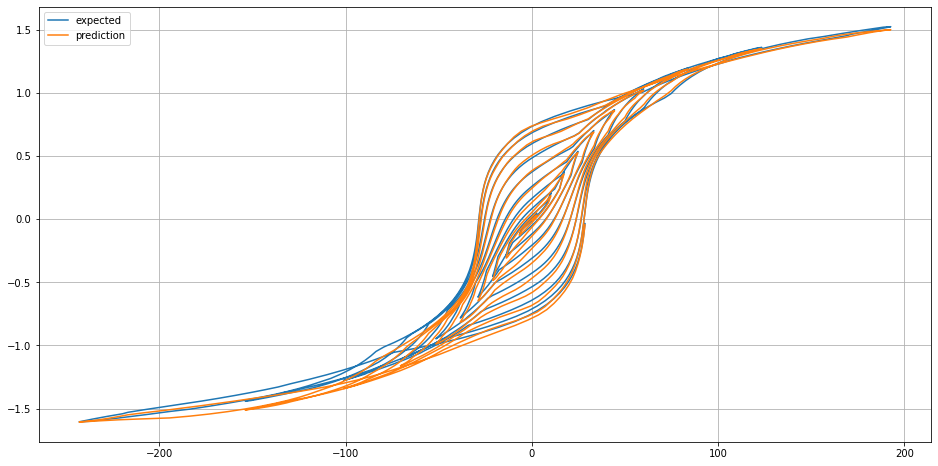

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 627.827305316925s


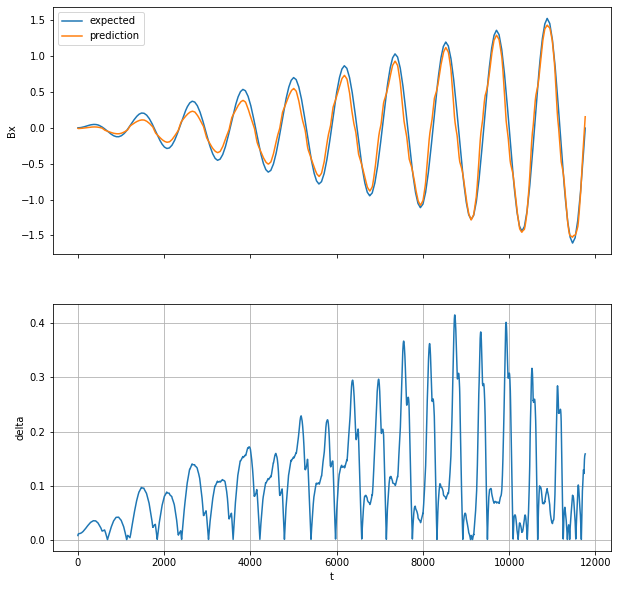

MSE: 0.01869826819336625


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

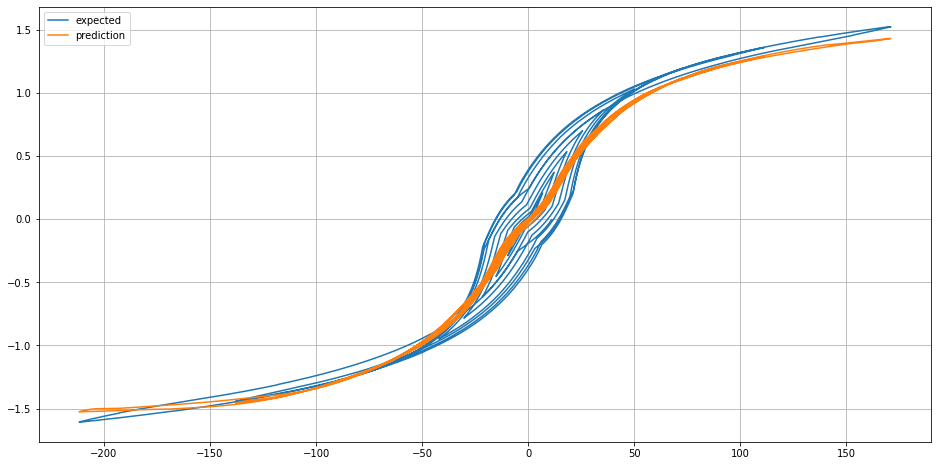

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Start inference loop on 2001 samples... DONE after 107.77941966056824s


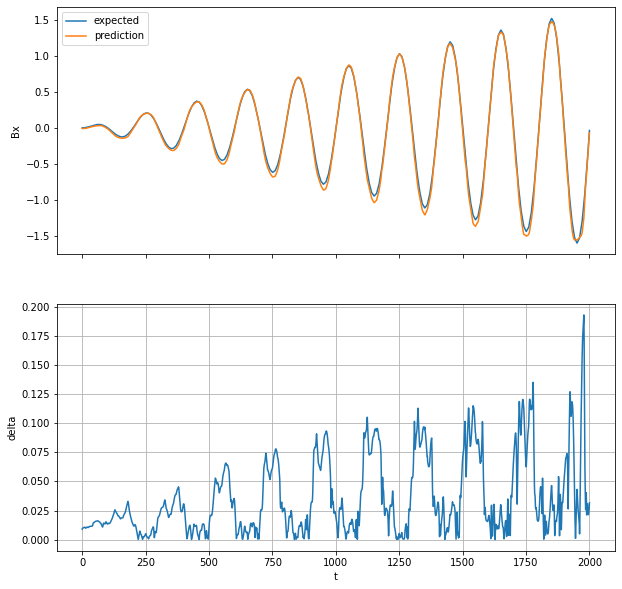

MSE: 0.0023824103197707565


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

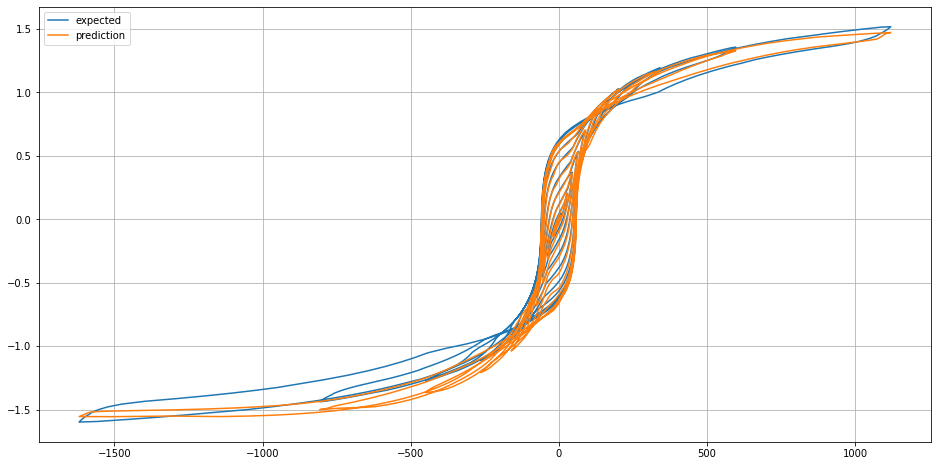

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 62.18686556816101s


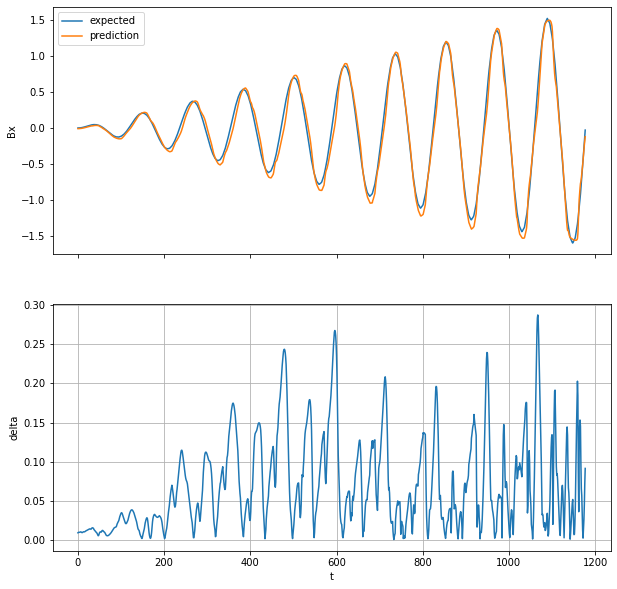

MSE: 0.008349837772716869


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

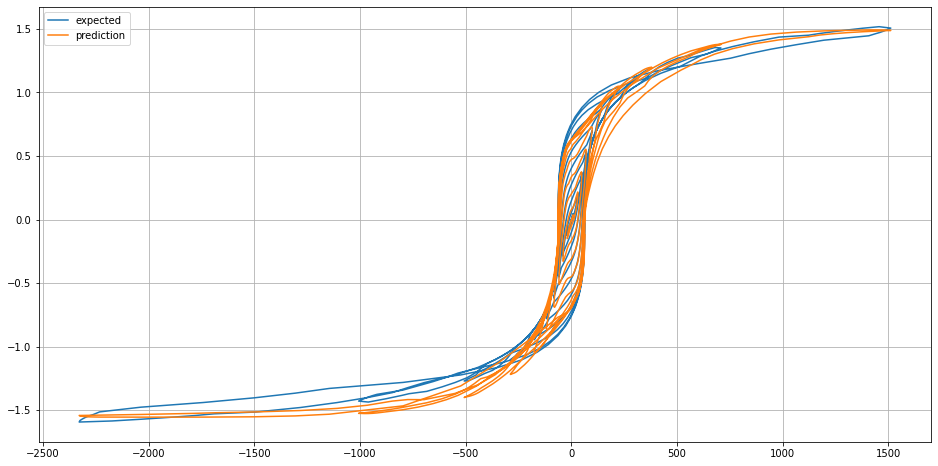

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Start inference loop on 2001 samples... DONE after 107.7913167476654s


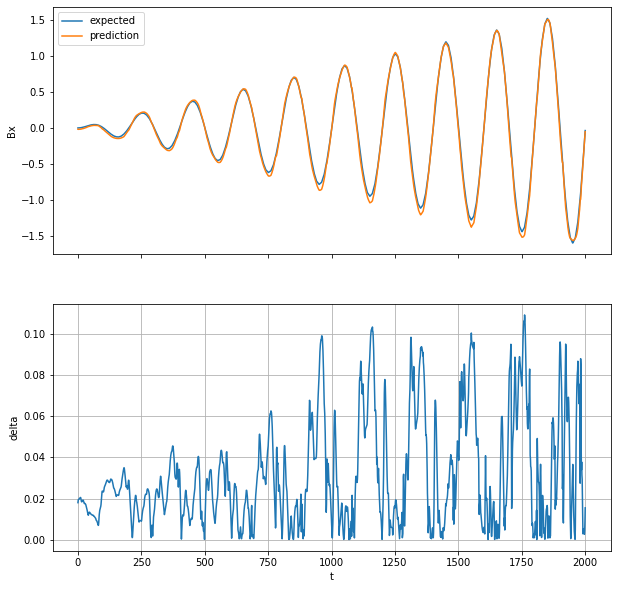

MSE: 0.0016681949821206556


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

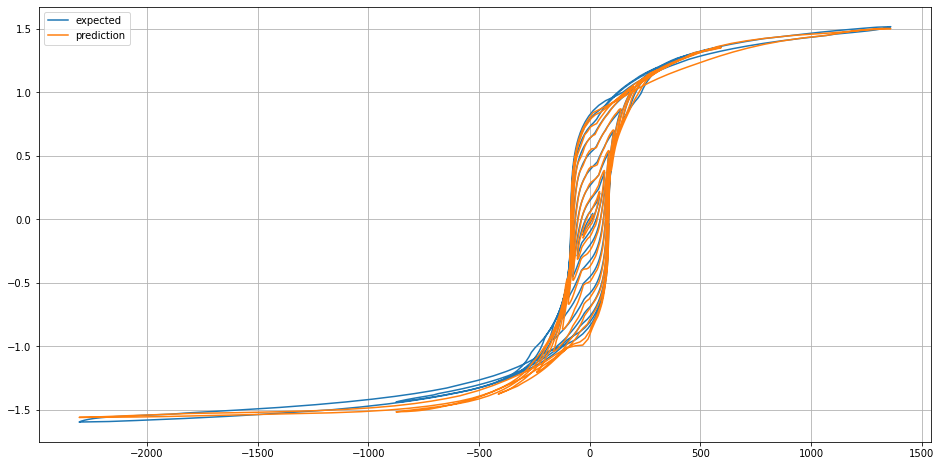

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 62.663071155548096s


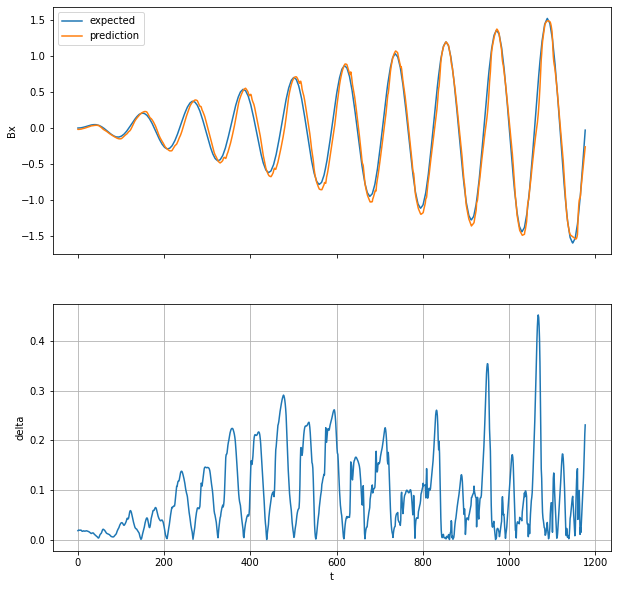

MSE: 0.014523142856962858


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

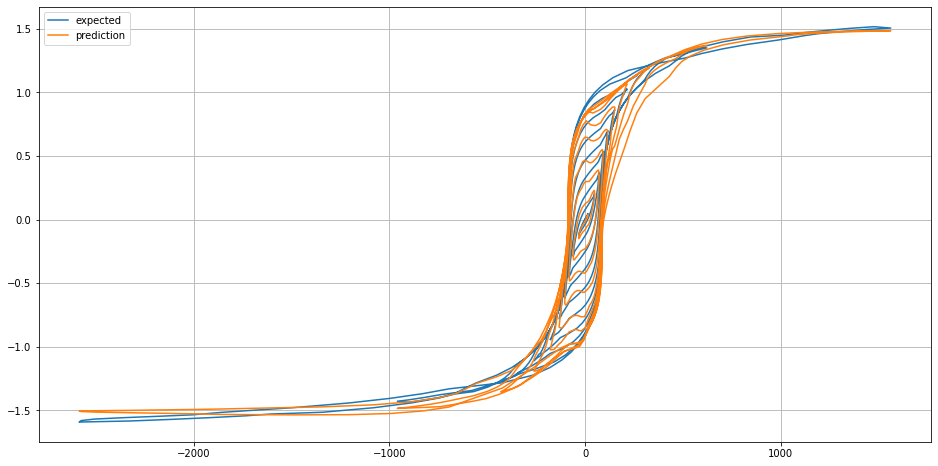

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Start inference loop on 2001 samples... DONE after 106.07425260543823s


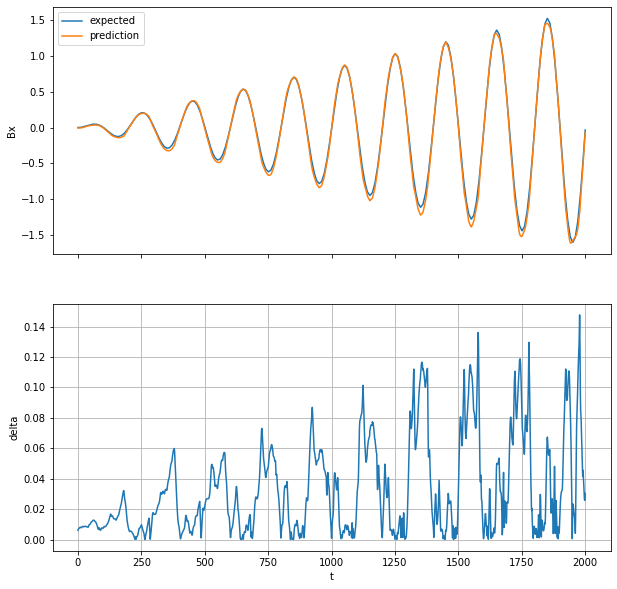

MSE: 0.0020667225873653326


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

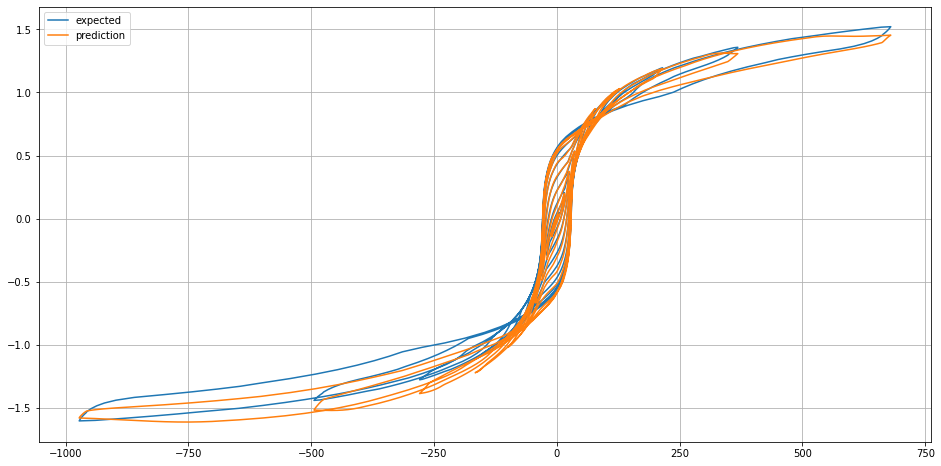

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 634.9006471633911s


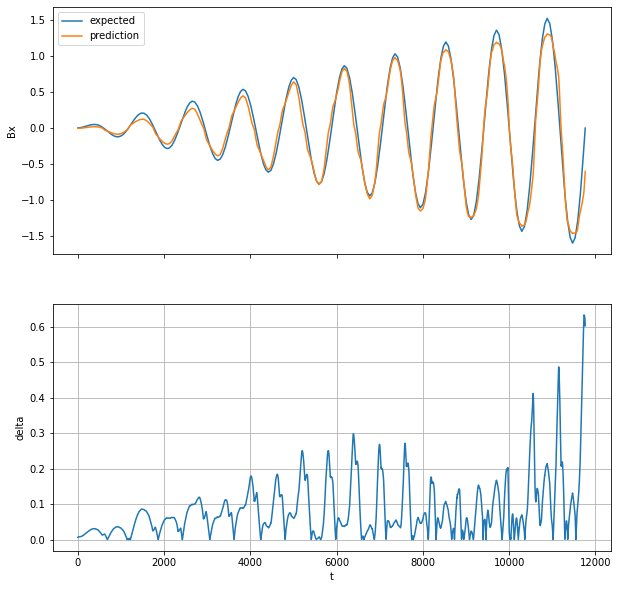

MSE: 0.01404349972999788


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_Squashed')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

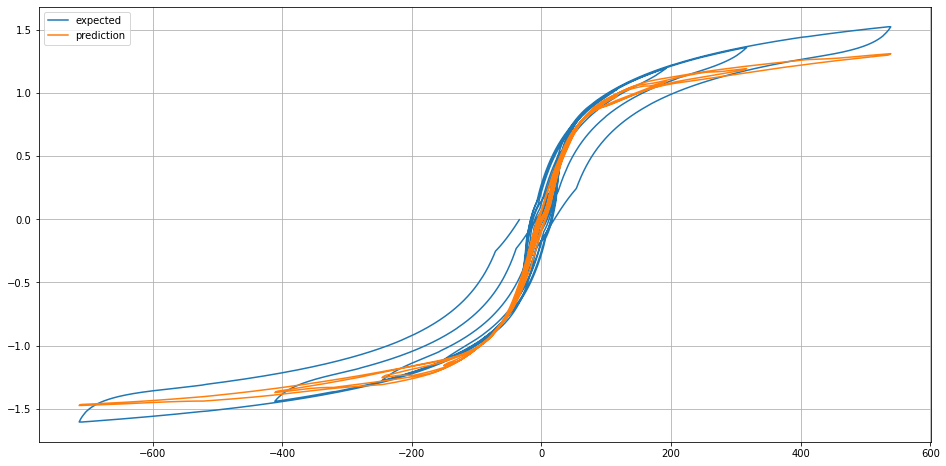

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## GRU1

### Training

Epoch 1/1000
161/161 [==============================] - 7s 25ms/step - loss: 0.0385
Epoch 2/1000
161/161 [==============================] - 4s 25ms/step - loss: 0.0085
Epoch 3/1000
161/161 [==============================] - 4s 24ms/step - loss: 0.0039
Epoch 4/1000
161/161 [==============================] - 4s 25ms/step - loss: 0.0022
Epoch 5/1000
161/161 [==============================] - 4s 25ms/step - loss: 0.0016
Epoch 6/1000
161/161 [==============================] - 4s 24ms/step - loss: 0.0013
Epoch 7/1000
161/161 [==============================] - 4s 24ms/step - loss: 0.0011
Epoch 8/1000
161/161 [==============================] - 4s 24ms/step - loss: 9.3458e-04
Epoch 9/1000
161/161 [==============================] - 4s 24ms/step - loss: 8.0331e-04
Epoch 10/1000
161/161 [==============================] - 4s 25ms/step - loss: 6.9837e-04
Epoch 11/1000
161/161 [==============================] - 5s 29ms/step - loss: 6.4416e-04
Epoch 12/1000
161/161 [==============================] - 4

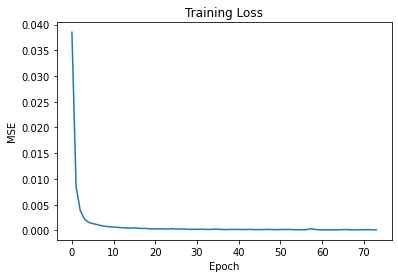

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, Squashed_train_X, Squashed_train_Y)
model.save('./Model_GRU1_Squashed')
plot_train_stats(history)
del model, history

### M6 (2000 data point version)

Start inference loop on 2001 samples... DONE after 97.76092195510864s


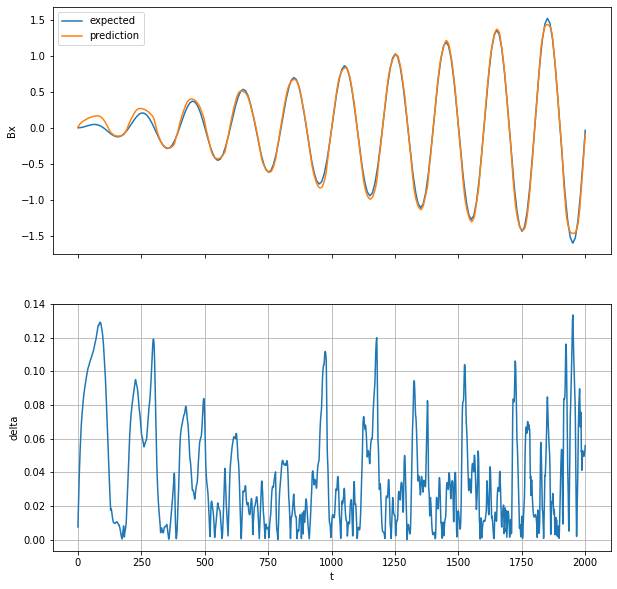

MSE: 0.0024408862801886103


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

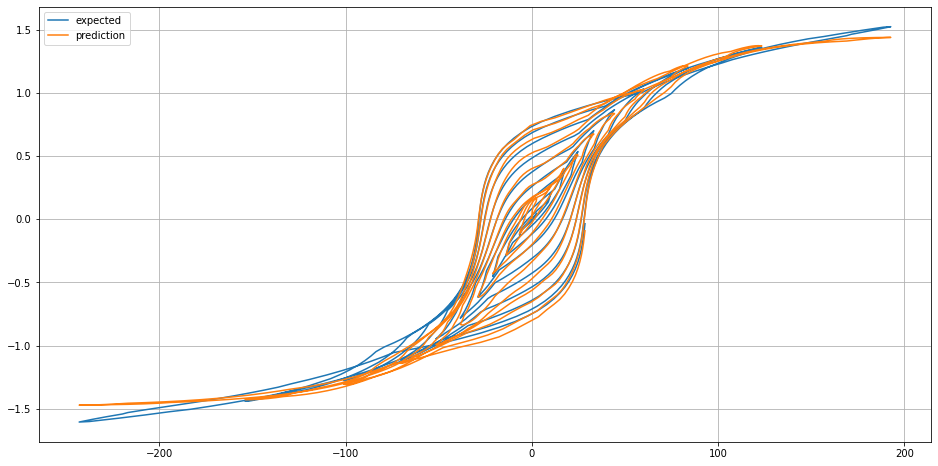

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 545.2878949642181s


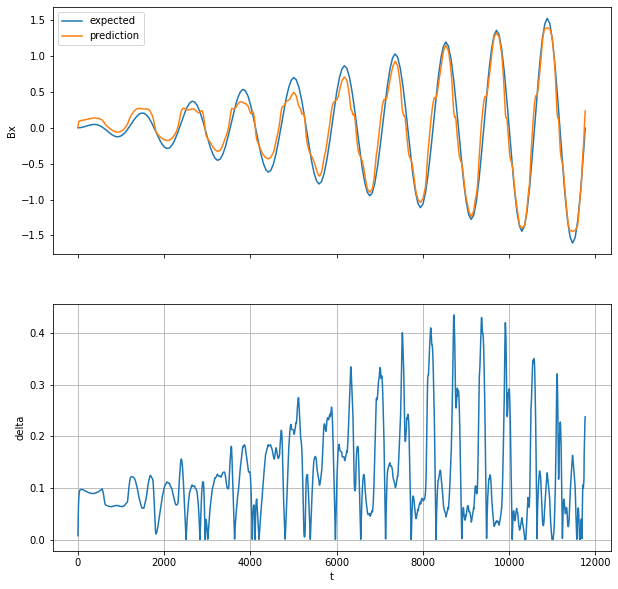

MSE: 0.02245352393244206


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

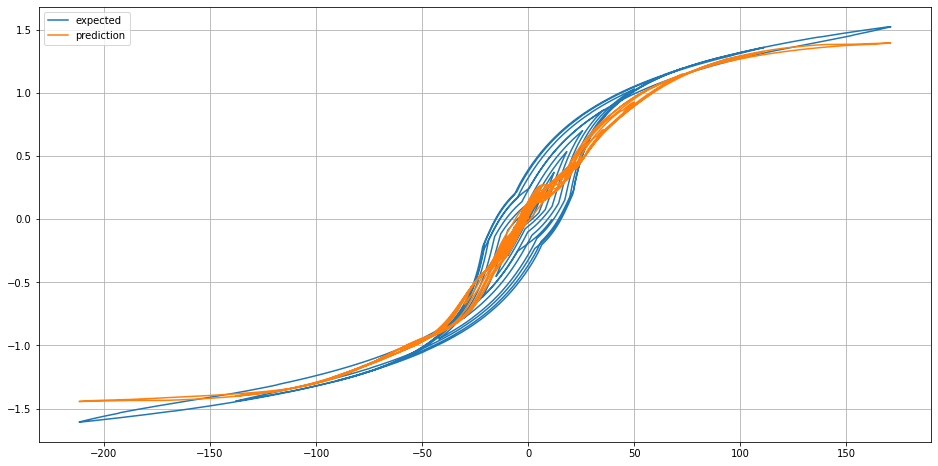

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Start inference loop on 2001 samples... DONE after 90.79689645767212s


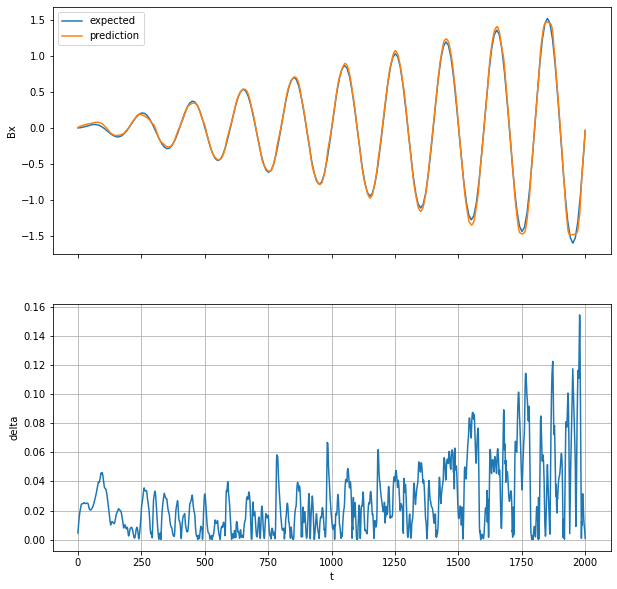

MSE: 0.0012910642126013172


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

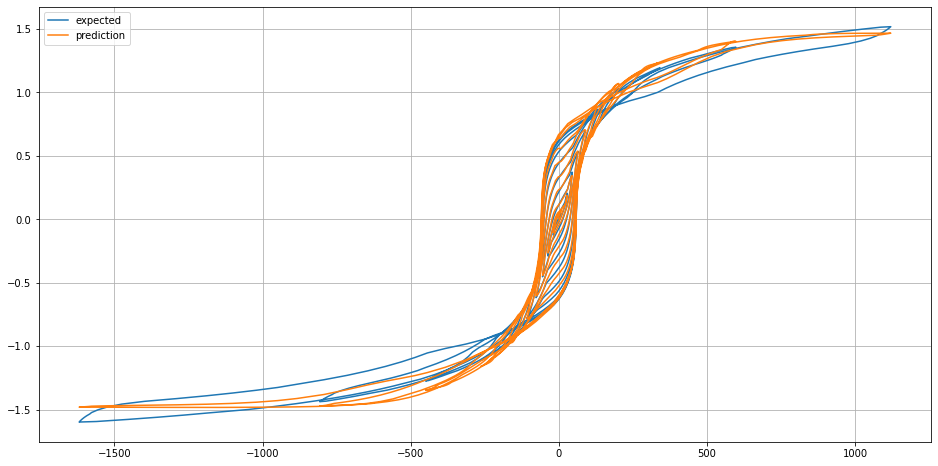

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 54.07719421386719s


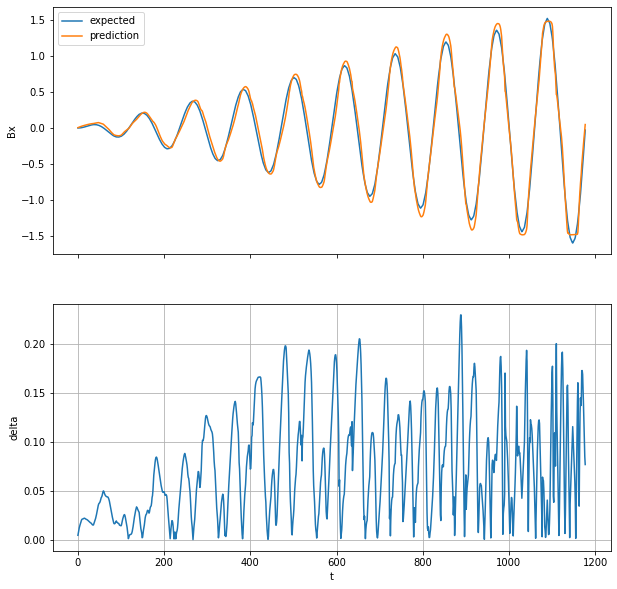

MSE: 0.008343268637565526


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

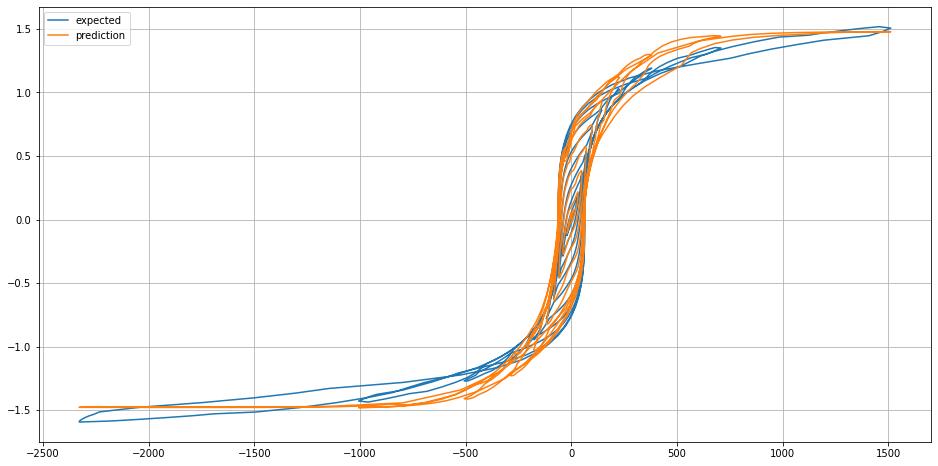

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Start inference loop on 2001 samples... DONE after 89.19696354866028s


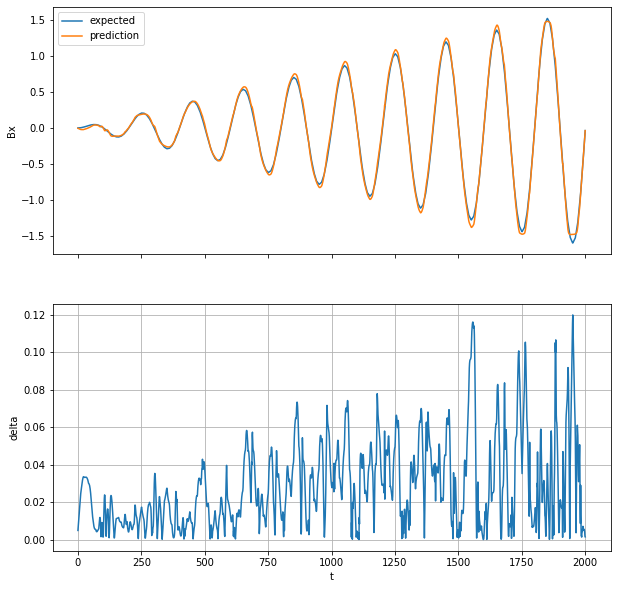

MSE: 0.0013448279259203855


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

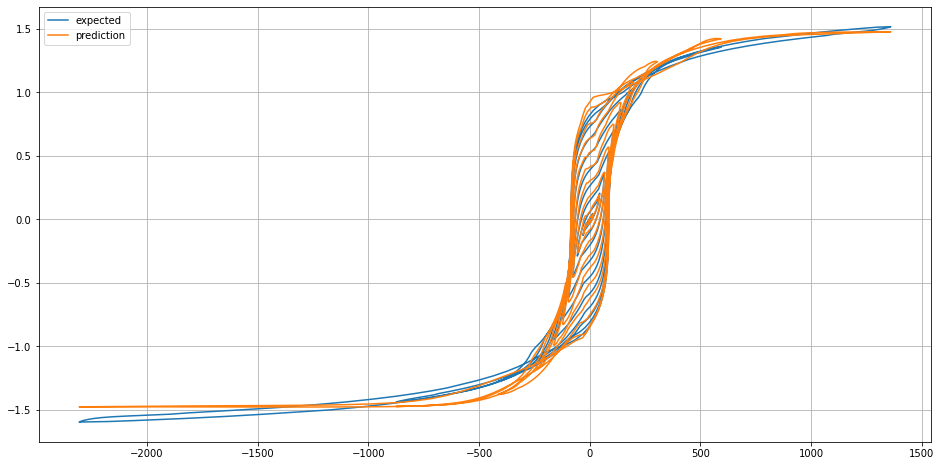

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 52.66456627845764s


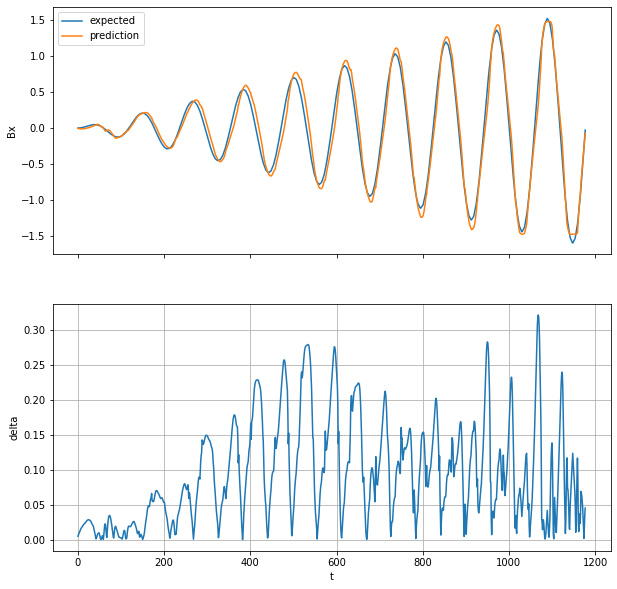

MSE: 0.014250385055159413


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

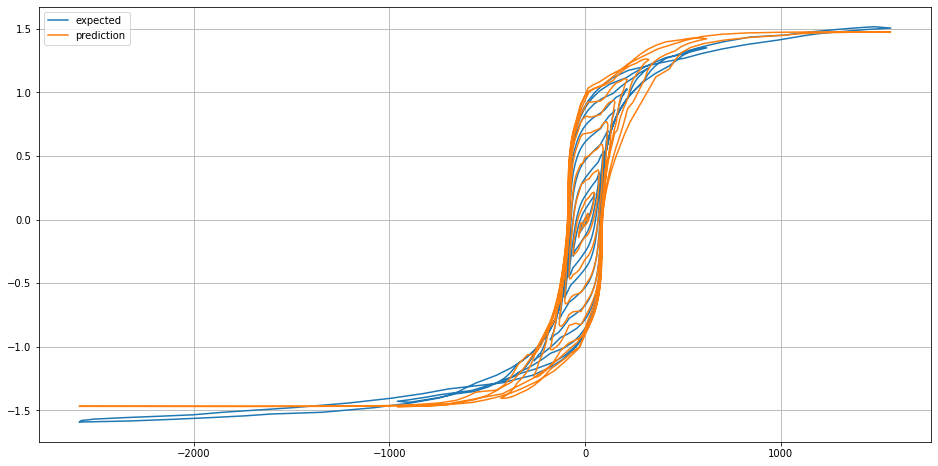

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Start inference loop on 2001 samples... DONE after 89.52088665962219s


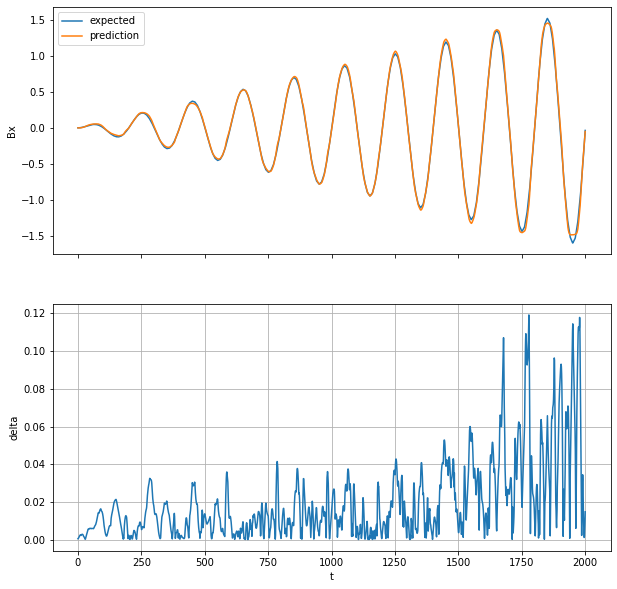

MSE: 0.0008348974667158815


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

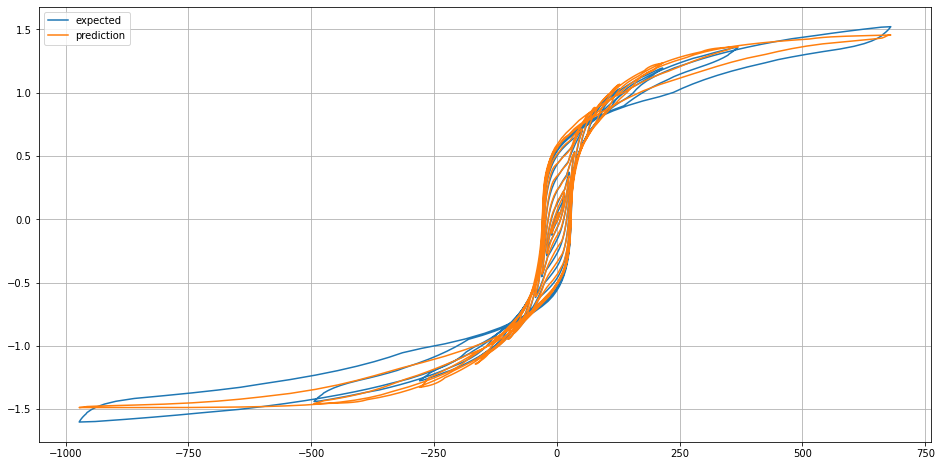

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 527.1091775894165s


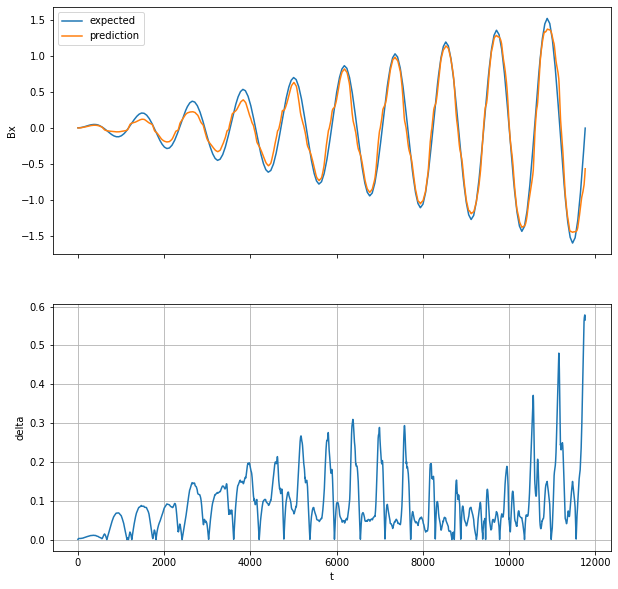

MSE: 0.014226291748472538


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_Squashed')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

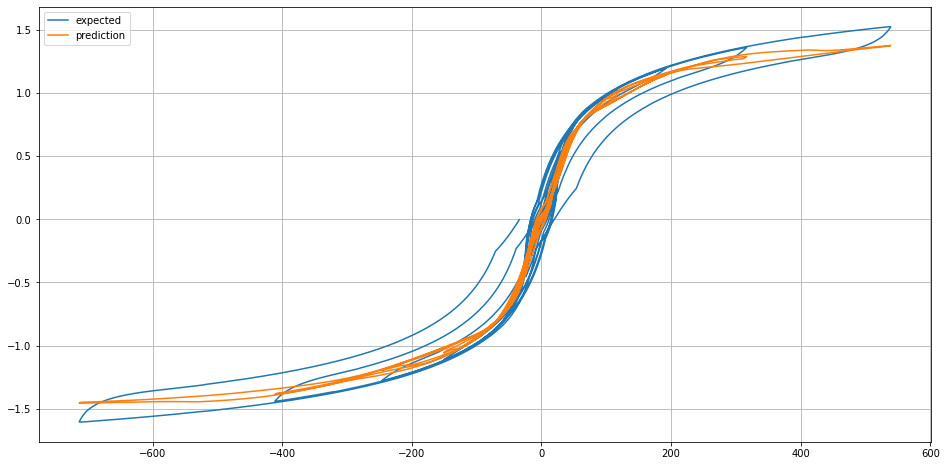

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

# The End